In [1]:
import tensorflow as tf 
import tensorflow_datasets as tfds
import numpy as np 
import matplotlib.pyplot as plt

2026-01-22 13:55:58.044226: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset=tfds.load('imdb_reviews',as_supervised=True)
train_dataset,test_dataset=dataset['train'],dataset['test']

batch_size=32
train_dataset=train_dataset.shuffle(1000).batch(batch_size)
test_dataset=test_dataset.batch(batch_size)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/imac/tensorflow_datasets/imdb_reviews/plain_text/incomplete.MXZTUF_1.0.0/imdb_reviews-train.t…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/imac/tensorflow_datasets/imdb_reviews/plain_text/incomplete.MXZTUF_1.0.0/imdb_reviews-test.tf…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/imac/tensorflow_datasets/imdb_reviews/plain_text/incomplete.MXZTUF_1.0.0/imdb_reviews-unsuper…

Dataset imdb_reviews downloaded and prepared to /Users/imac/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
example,label=next(iter(train_dataset))
print(example.numpy()[0])
print(label.numpy()[0])

b"I absolutely LOVED this movie when I was a kid. I cried every time I watched it. It wasn't weird to me. I totally identified with the characters. I would love to see it again (and hope I wont be disappointed!). Pufnstuf rocks!!!! I was really drawn in to the fantasy world. And to me the movie was loooong. I wonder if I ever saw the series and have confused them? The acting I thought was strong. I loved Jack Wilde. He was so dreamy to an 10 year old (when I first saw the movie, not in 1970. I can still remember the characters vividly. The flute was totally believable and I can still 'feel' the evil woods. Witchy poo was scary - I wouldn't want to cross her path."
1


2026-01-22 13:58:42.546903: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [4]:
encoder=tf.keras.layers.TextVectorization(max_tokens=10000)
encoder.adapt(train_dataset.map(lambda text,labels:text))
vocabulary=np.array(encoder.get_vocabulary())


orginal_text=example.numpy()[0]
encoded_text=encoder(orginal_text).numpy()
decoded_text=' '.join(vocabulary[encoded_text])
print(orginal_text)
print(decoded_text) 


b"I absolutely LOVED this movie when I was a kid. I cried every time I watched it. It wasn't weird to me. I totally identified with the characters. I would love to see it again (and hope I wont be disappointed!). Pufnstuf rocks!!!! I was really drawn in to the fantasy world. And to me the movie was loooong. I wonder if I ever saw the series and have confused them? The acting I thought was strong. I loved Jack Wilde. He was so dreamy to an 10 year old (when I first saw the movie, not in 1970. I can still remember the characters vividly. The flute was totally believable and I can still 'feel' the evil woods. Witchy poo was scary - I wouldn't want to cross her path."
i absolutely loved this movie when i was a kid i cried every time i watched it it wasnt weird to me i totally identified with the characters i would love to see it again and hope i wont be disappointed [UNK] rocks i was really drawn in to the fantasy world and to me the movie was [UNK] i wonder if i ever saw the series and ha

2026-01-22 13:58:51.053993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [7]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [8]:
history=model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 488s 614ms/step - accuracy: 0.8202 - loss: 0.3721 - val_accuracy: 0.8763 - val_loss: 0.3091
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 484s 619ms/step - accuracy: 0.9162 - loss: 0.2076 - val_accuracy: 0.8747 - val_loss: 0.3234
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 479s 612ms/step - accuracy: 0.9480 - loss: 0.1329 - val_accuracy: 0.8655 - val_loss: 0.4696
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 481s 615ms/step - accuracy: 0.9654 - loss: 0.0916 - val_accuracy: 0.8549 - val_loss: 0.5237
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 493s 631ms/step - accuracy: 0.9776 - loss: 0.0592 - val_accuracy: 0.8453 - val_loss: 0.6161


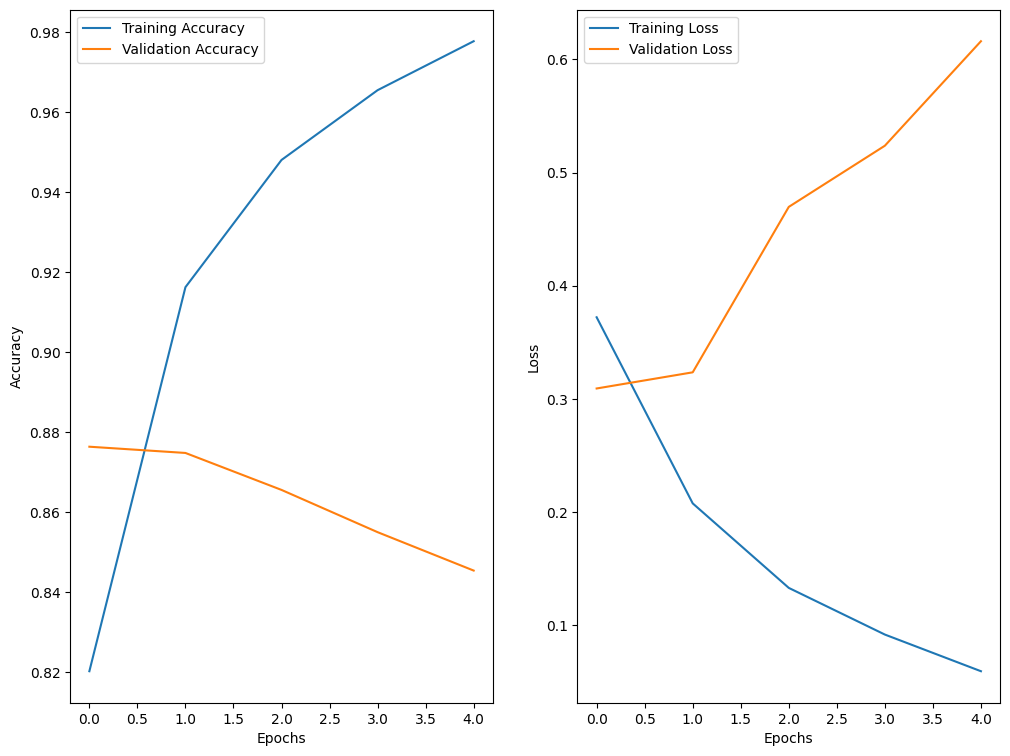

In [9]:
from matplotlib import pyplot as plt

history_dict=history.history
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
val_loss=history_dict['val_loss']
loss=history_dict['loss']

plt.figure(figsize=(12,9))
plt.subplot(1,2,1)
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

testing the trained model

In [11]:
sample_text=["This movie was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!"]
predicted=model.predict(sample_text)
print(predicted)

ValueError: Unrecognized data type: x=['This movie was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!'] (of type <class 'list'>)